In [1]:
import pandas as pd
import numpy as np

import requests
import openpyxl as xl
import time
import json

import folium
import re

#import geopandas as gpd
from matplotlib import pyplot as plt # 그래프 그리는 용도
import seaborn as sns
# from plotnine import *
#from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 숨기기

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates

from sklearn.cluster import AgglomerativeClustering

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [4]:
df = pd.read_excel("fin_dataset_dong.xlsx")
df2 = pd.read_excel("fin_dataset_goo.xlsx")

In [5]:
df["one_ratio"] = df["one_hh"] / df["sum_pop"] 
df_동= df.copy()

## 행정동 (임시)클러스터링 : Kmeans 

In [14]:
dong_df = df.copy()
dong_df = dong_df[["dong_nm","sum_hh", "count_zero", "count_market", "count_bus", "count_station", "sum_waste"]]
dong_df.set_index("dong_nm",inplace=True) # 지역구 이름 인덱싱 -> 정규화하기 위함

In [15]:
dong_norm = dong_df.apply(preprocessing.scale, axis=0)

In [20]:
memb = fcluster(linkage(dong_norm, 'complete'), 8, criterion='maxclust')
#memb = pd.Series(memb, index=dong_norm.index)

#for key, item in memb.groupby(memb):
#    print(key, ': ', ', '.join(item.index))

In [21]:
memb

array([7, 7, 7, 8, 4, 5, 8, 8, 6, 8, 8, 8, 3, 7, 7, 8, 8, 8, 8, 8, 8, 8,
       7, 8, 7, 7, 7, 5, 8, 1, 8, 7, 7, 7, 8, 7, 8, 8, 7, 6, 8, 8, 8, 8,
       7, 6, 7, 8, 8, 8, 6, 6, 6, 6, 8, 7, 8, 3, 5, 5, 8, 8, 8, 8, 6, 7,
       8, 8, 8, 3, 8, 8, 5, 8, 3, 8, 8, 5, 8, 8, 7, 8, 4, 8, 8, 8, 8, 7,
       6, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 7, 8, 6, 8, 8, 8, 8, 8, 7, 2, 8,
       8, 7, 3, 7, 8, 8, 8, 8, 8, 7, 8, 5, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8,
       8, 7, 8, 8, 7, 8, 8, 7, 7, 5, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7,
       8, 8, 8, 3, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 7, 8, 8, 7, 7, 8, 8, 8,
       8, 7, 3, 8, 8, 6, 8, 8, 3, 8, 3, 4, 8, 8, 7, 8, 8, 3, 6, 7, 7, 7,
       6, 8, 6, 8, 7, 8, 6, 7, 6, 8, 5, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 8,
       8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 1, 8, 8, 7, 8,
       8, 8, 7, 7, 7, 8, 8, 6, 8, 8, 8, 8, 7, 8, 8, 7, 7, 8, 7, 6, 8, 7,
       8, 8, 8, 8, 8, 6, 8, 7, 8, 3, 8, 7, 8, 3, 5, 7, 3, 6, 3, 6, 7, 7,
       8, 7, 8, 3, 8, 8, 8, 8, 7, 8, 8, 8, 5, 8, 7,

In [215]:
len(memb[memb==7])

95

In [216]:
len(memb[memb==4])

3

In [217]:
len(memb[memb==5])

13

In [212]:
dong_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, dong_norm.index)] # 클러스터 변수 생성
grouped_d = dong_norm.groupby('cluster')

In [213]:
grouped_d.agg('mean')

,sum_hh,count_zero,count_market,count_bus,count_station,sum_waste
cluster,,,,,,
1,-1.603082,-0.325823,7.447299,-0.813535,0.410096,-0.471201
2,-1.287523,0.675257,4.107113,1.357982,2.841993,-0.739415
3,1.476218,1.025636,-0.156536,1.805580,0.653285,-0.452746
4,1.710795,-0.325823,2.928224,3.861873,0.410096,0.643216
5,1.369715,-0.325823,0.600673,0.853454,2.093717,2.075467
6,-0.368444,2.999195,0.247654,-0.087058,0.019255,-0.474743
7,0.603778,-0.167758,0.566309,0.101021,0.179706,0.202716
8,-0.355526,-0.325823,-0.390047,-0.263071,-0.263353,-0.087155


4, 5, 7 cluster

In [218]:
memb2 = fcluster(linkage(dong_norm, 'complete'), 10, criterion='maxclust')
memb2 = pd.Series(memb2, index=dong_norm.index)

for key, item in memb2.groupby(memb2):
    print(key, ': ', ', '.join(item.index))

1 :  광희동, 신당동
2 :  명동, 종로1.2.3.4가동, 한강로동
3 :  녹번동, 대방동, 목2동, 사당2동, 상도1동, 여의동
4 :  개봉1동, 대학동, 상암동, 서강동, 서초3동, 신내1동, 양재1동, 역촌동, 연희동, 오류2동, 은천동, 종암동, 진관동, 홍은2동
5 :  가산동, 독산1동, 서교동
6 :  가양1동, 공항동, 논현1동, 논현2동, 대치2동, 도곡2동, 문정2동, 발산1동, 방화2동, 세곡동, 역삼1동, 용신동, 화곡1동
7 :  가회동, 구의3동, 길음1동, 남가좌1동, 남가좌2동, 남영동, 남현동, 당산1동, 동선동, 망원2동, 상도4동, 서초4동, 성내2동, 성북동, 성수1가2동, 성수2가3동, 신월2동, 신촌동, 암사2동, 연남동, 염리동, 월계1동, 을지로동, 조원동, 중화1동, 합정동, 회현동, 흑석동
8 :  가락1동, 가락2동, 가락본동, 개봉2동, 개봉3동, 고척1동, 공덕동, 공릉1동, 공릉2동, 구로1동, 구로2동, 구로3동, 구로5동, 구의2동, 길동, 길음2동, 노량진1동, 당산2동, 도봉2동, 돈암2동, 등촌1동, 등촌3동, 망우본동, 면목본동, 목1동, 목3동, 문래동, 방배4동, 방이2동, 방학3동, 방화1동, 보문동, 불광1동, 삼선동, 삼성1동, 삼성2동, 삼전동, 상계1동, 상계2동, 상계9동, 서원동, 석관동, 석촌동, 성내1동, 성산2동, 성수2가1동, 송중동, 송천동, 송파1동, 수유1동, 시흥1동, 신도림동, 신사동, 신사동, 신수동, 신월7동, 신정3동, 신정4동, 신정7동, 쌍문2동, 압구정동, 양평1동, 역삼2동, 염창동, 영등포동, 오금동, 용강동, 우장산동, 원효로1동, 인수동, 인헌동, 일원2동, 자양2동, 자양3동, 잠실2동, 잠실3동, 잠실6동, 잠실본동, 장안2동, 장위2동, 전농1동, 제기동, 중계1동, 중계2.3동, 중곡1동, 중화2동, 창2동, 천호2동, 청담동, 청룡동, 풍납2동, 홍은1동, 화곡6동, 화곡본동, 화양동
9 :  금호1가동, 금호4가동, 대조동, 대

In [220]:
dong_norm['cluster']=[' {}'.format(i) for i,company in zip(memb2, dong_norm.index)] # 클러스터 변수 생성
grouped_d2 = dong_norm.groupby('cluster')
grouped_d2.agg('mean')

,sum_hh,count_zero,count_market,count_bus,count_station,sum_waste
cluster,,,,,,
1,-1.603082,-0.325823,7.447299,-0.813535,0.410096,-0.471201
10,-0.384285,-0.325823,-0.413852,-0.280456,-0.531095,-0.038548
2,-1.287523,0.675257,4.107113,1.357982,2.841993,-0.739415
3,1.327594,2.677419,0.079241,0.726469,2.234018,-0.457789
4,1.539913,0.317728,-0.257584,2.268056,-0.024171,-0.450585
5,1.710795,-0.325823,2.928224,3.861873,0.410096,0.643216
6,1.369715,-0.325823,0.600673,0.853454,2.093717,2.075467
7,-0.368444,2.999195,0.247654,-0.087058,0.019255,-0.474743
8,0.603778,-0.167758,0.566309,0.101021,0.179706,0.202716


# 지역구 기준 클러스터링

k == 3 으로 고정

In [22]:
goo_df = df2.copy()
goo_df = goo_df[["goo_nm","sum_hh", "count_zero", "count_market", "count_bus", "count_station", "sum_waste"]]

In [23]:
goo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   goo_nm         25 non-null     object 
 1   sum_hh         25 non-null     int64  
 2   count_zero     25 non-null     int64  
 3   count_market   25 non-null     int64  
 4   count_bus      25 non-null     int64  
 5   count_station  25 non-null     int64  
 6   sum_waste      25 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.5+ KB


### 완전연결법과 유클리드 거리 사용 -> 계층적 군집화 실행 
- 변수 정규화 필요 
- 몇 개의 군집이 합리적 ?

In [7]:
goo_df.set_index("goo_nm",inplace=True) # 지역구 이름 인덱싱 -> 정규화하기 위함

NameError: name 'goo_df' is not defined

In [8]:
goo_df

NameError: name 'goo_df' is not defined

In [26]:
# scikit-learn uses population standard deviation - 정규화 (1)
# 두개의 방법 중 하나 택함
#goo_norm = (goo_df - goo_df.mean())/goo_df.std()
goo_norm = goo_df.apply(preprocessing.scale, axis=0)
goo_norm

,sum_hh,count_zero,count_market,count_bus,count_station,sum_waste
goo_nm,,,,,,
강남구,0.994166,-1.236488,2.398313,1.005419,2.349009,2.692434
강동구,0.358331,0.779525,-0.226811,-0.460425,-0.270704,0.525262
강북구,-0.591718,-1.236488,-0.646830,-0.310082,-0.052394,-0.972017
강서구,1.701821,-0.564483,-0.121806,1.634980,1.039153,2.204654
관악구,1.799389,0.107521,0.088204,0.422840,-1.143941,-0.356098
광진구,-0.144517,-0.564483,-0.016801,-1.437655,-0.489013,-0.392209
구로구,0.096151,-1.236488,0.088204,0.328875,-0.270704,-0.630159
금천구,-1.120955,-1.236488,-0.331816,-0.855076,-1.798869,1.323992
노원구,0.870992,-0.564483,-0.436821,0.845679,0.165915,-0.762336


In [10]:
d_norm = pairwise.pairwise_distances(goo_norm, metric='euclidean') # euclidean : 거리계산 유형

pd.DataFrame(d_norm, columns=goo_norm.index, index=goo_norm.index) 

# 정규화한 값으로 유클리드 거리를 사영해 계산된 처음 5개의 지역구 간 거리 행렬 (딱히 의미 없음)

goo_nm,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
goo_nm,,,,,,,,,,,,,,,,,,,,,
강남구,0.000000,5.006805,5.719564,3.106987,5.442885,5.578438e+00,4.950077,5.870801,5.023106,6.453724,...,5.075241,5.091699,2.831264,5.947738,4.073083,5.992148e+00,5.247619,6.402686,5.906963,6.279334
강동구,5.006805,0.000000,2.730462,3.542479,2.224178,1.986884e+00,2.488026,3.064740,2.380701,2.847909,...,1.600427,2.445295,3.827378,1.575285,1.811032,2.251120e+00,1.203108,3.046777,4.802533,2.210104
강북구,5.719564,2.730462,0.000000,4.588414,3.189363,1.687231e+00,1.259457,2.999696,2.015596,1.334109,...,2.469425,3.115453,5.341792,1.864481,2.387662,1.712521e+00,2.710887,1.535482,4.835589,1.505372
강서구,3.106987,3.542479,4.588414,0.000000,3.646621,4.684023e+00,3.812042,4.847069,3.313318,5.043941,...,3.795699,3.655169,3.023173,4.634916,3.024466,5.132504e+00,3.288494,5.442685,6.909582,4.587216
관악구,5.442885,2.224178,3.189363,3.646621,0.000000,2.851852e+00,2.356663,3.923759,1.910159,3.282668,...,3.278255,2.249984,4.491959,2.350743,2.666149,3.481791e+00,1.816949,4.127198,5.906518,2.520255
광진구,5.578438,1.986884,1.687231,4.684023,2.851852,2.980232e-08,1.935315,2.550437,2.643334,1.731060,...,2.549194,3.391119,4.888553,0.981012,2.551854,1.513135e+00,2.627312,2.181356,4.071790,1.626507
구로구,4.950077,2.488026,1.259457,3.812042,2.356663,1.935315e+00,0.000000,3.035375,1.342689,2.010187,...,2.577005,2.409411,4.751311,2.051488,1.887587,2.277644e+00,2.322079,2.469555,4.859622,1.896123
금천구,5.870801,3.064740,2.999696,4.847069,3.923759,2.550437e+00,3.035375,0.000000,3.941596,2.271427,...,3.507943,4.456134,6.020503,2.920852,3.754777,2.957188e+00,3.617718,2.925836,5.103393,2.781466
노원구,5.023106,2.380701,2.015596,3.313318,1.910159,2.643334e+00,1.342689,3.941596,0.000000,2.744951,...,2.452613,1.809573,4.309040,2.325062,1.678333,2.876946e+00,1.692384,3.178503,5.674213,2.132384


### 덴드로그램

method :  single, complete, average, centroid, ward linkage 방식이 존재

  - Centroid : 두 군집의 중심점(centroid)를 정의한 다음 두 중심점의 거리를 군집간의 거리로 측정

​

  - Single : 최단 연결법, 두 군집에 있는 모든 데이터 조합에서 데이터 사이 거리를 측정해서 가장 최소 거리(작은 값)를 기준으로 군집 거리를 측정

​

  - Complete : 최장 연결법으로 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식

​

  - Average : 평균 연결법, 두 군집의 데이터들 간 모든 거리들의 평균을 군집간 거리로 정의

​

  - Ward : 연결될 수 있는 군집 조합을 만들고, 군집 내 편차들의 제곱합을 기준으로 (군집의 평균과 데이터들 사이의 오차 제곱합(SSE)을 측정해) 최소 제곱합을 가지게 되는 군집끼리 연결

<br>
데이터의 분포에 따라 적절한 방식을 결정

<br>

참고 : https://github.com/Hanbyeongrim/machine-learning-base/blob/833e18a7fc0d16094c7a2ae80e87a7b62eeb863b/Lab_03_2)

fcluster함수에서 criterion parameter을 어떻게 잡느냐에 따라 군집 결정이 달라진다.

distance는 군집 내 길이가 어느정도(여기서는 13) 이상이 될 경우 군집을 만들지 말라는 뜻이고,

maxcluster를 사용하면 최대로 만들 수 있는 군집 수까지만 만들게 된다.

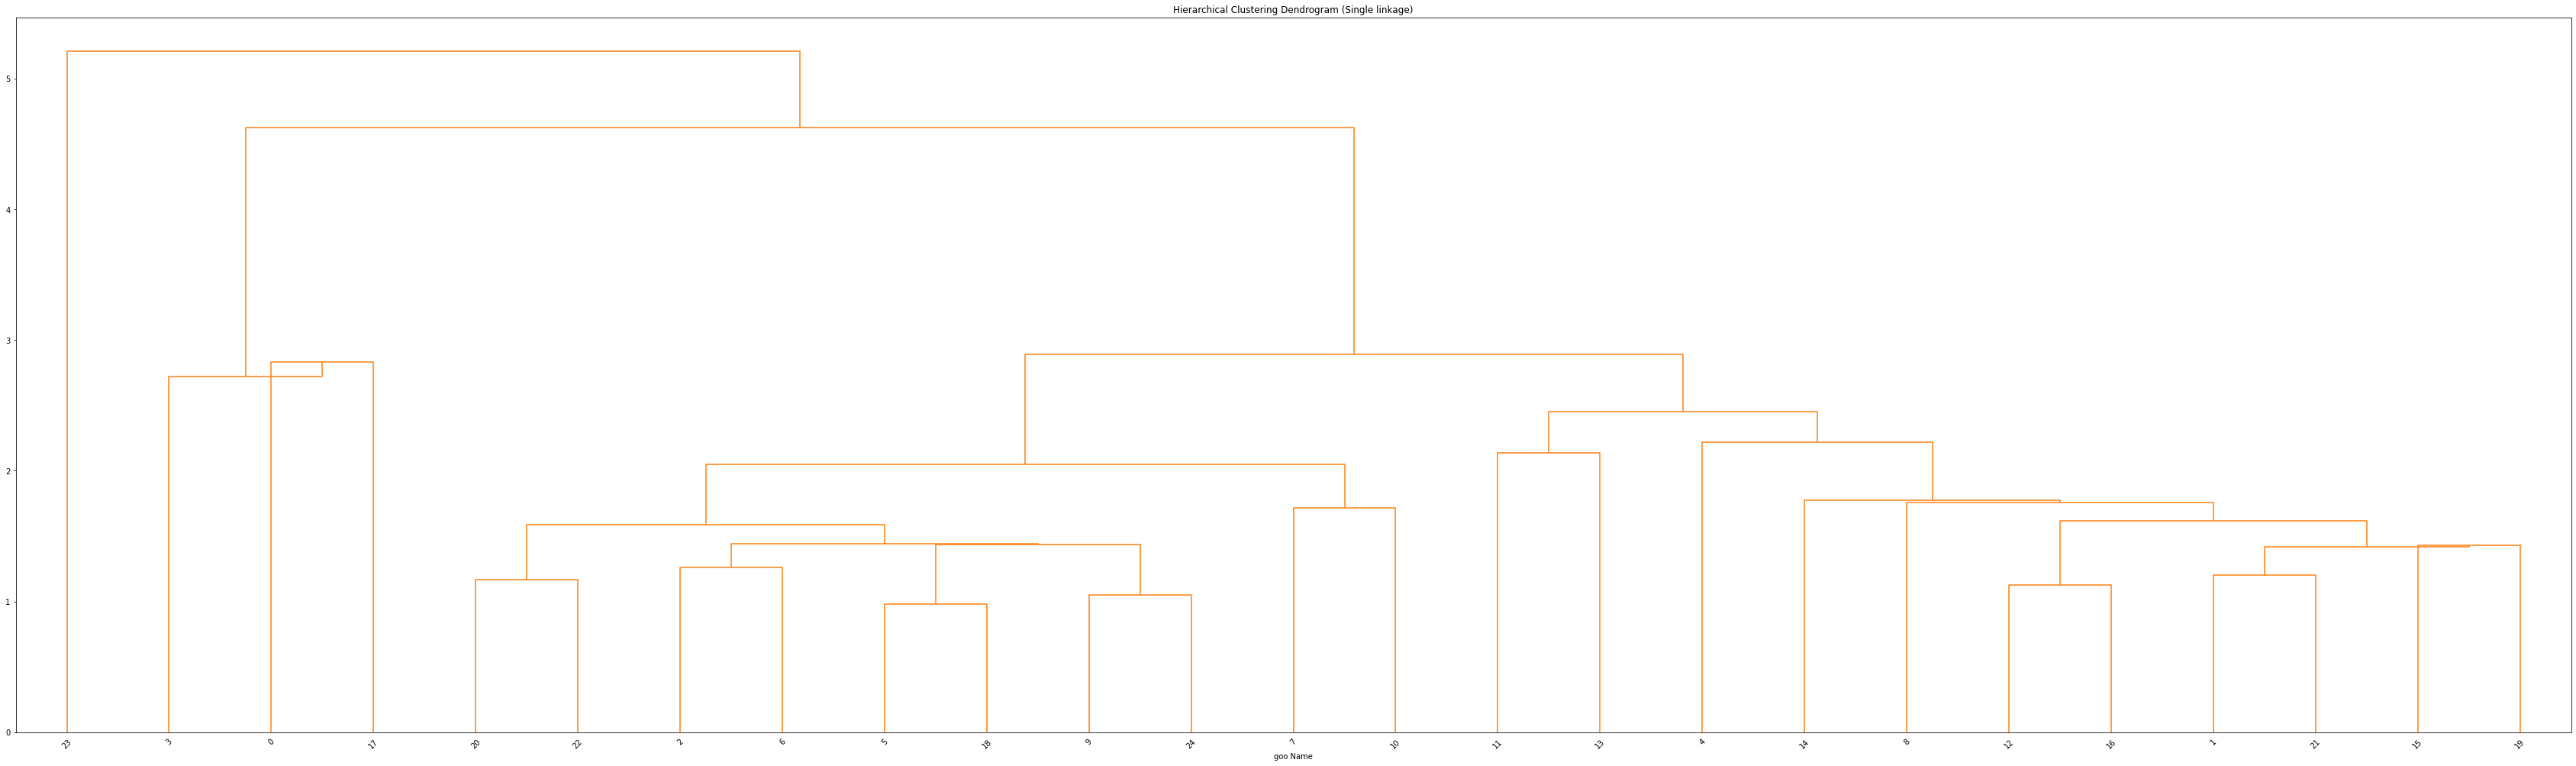

In [225]:
# 덴드로그램

Z = linkage(goo_norm, method='centroid') # single / complete / average 
# complete 어느 정도 수준까지 같은 군집으로 볼 것인가

fig = plt.figure(figsize=(60, 20))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')  # 계층적 군집화를 실행하는 덴드로그램
plt.xlabel("goo Name")

dendrogram(Z, color_threshold = 8) # 어느 정도 수준까지를 같은 군집으로 볼 것이냐를 판단하고 시각화하는 옵션
plt.axhline(y=13, color='black', linewidth=10, linestyle='dashed')
plt.show()

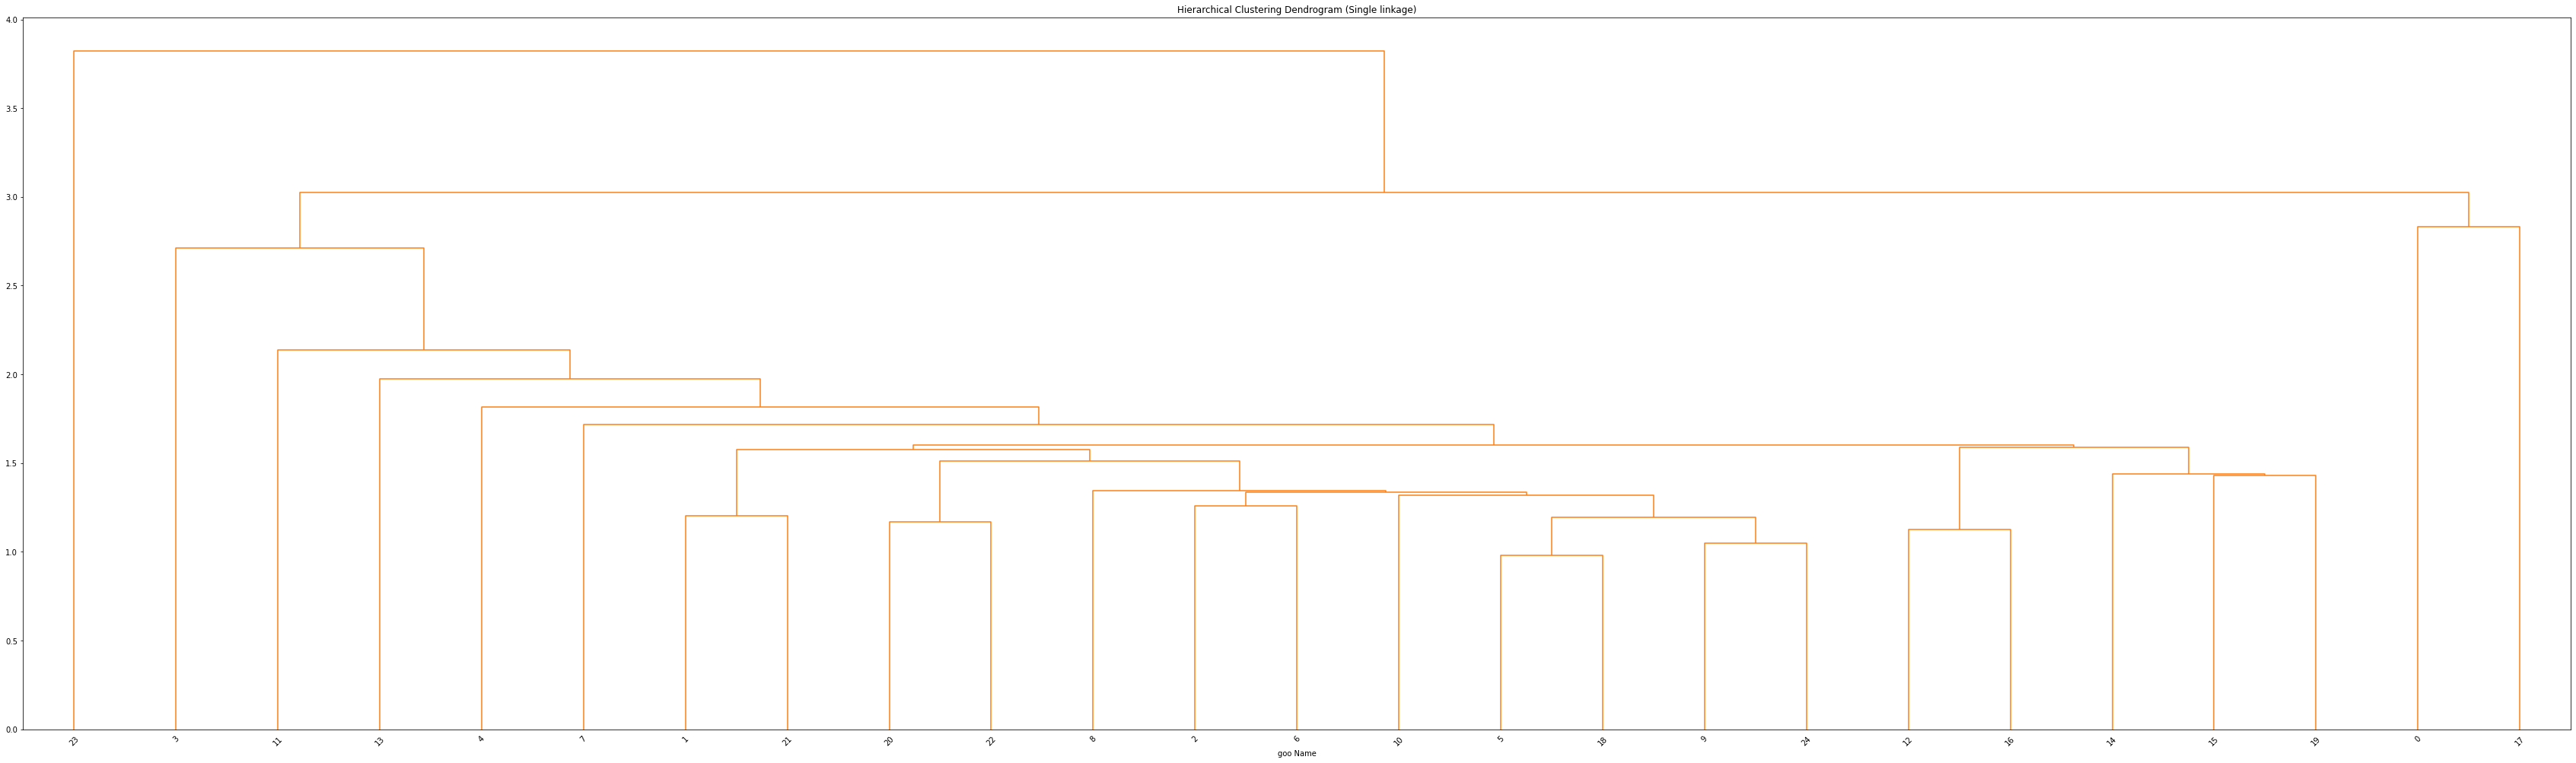

In [189]:
Z = linkage(goo_norm, method='single') # single / complete / average 
# complete 어느 정도 수준까지 같은 군집으로 볼 것인가

fig = plt.figure(figsize=(60, 20))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')  # 계층적 군집화를 실행하는 덴드로그램
plt.xlabel("goo Name")

dendrogram(Z, color_threshold = 5) # 어느 정도 수준까지를 같은 군집으로 볼 것이냐를 판단하고 시각화하는 옵션
plt.axhline(y=13, color='black', linewidth=10, linestyle='dashed')
plt.show()

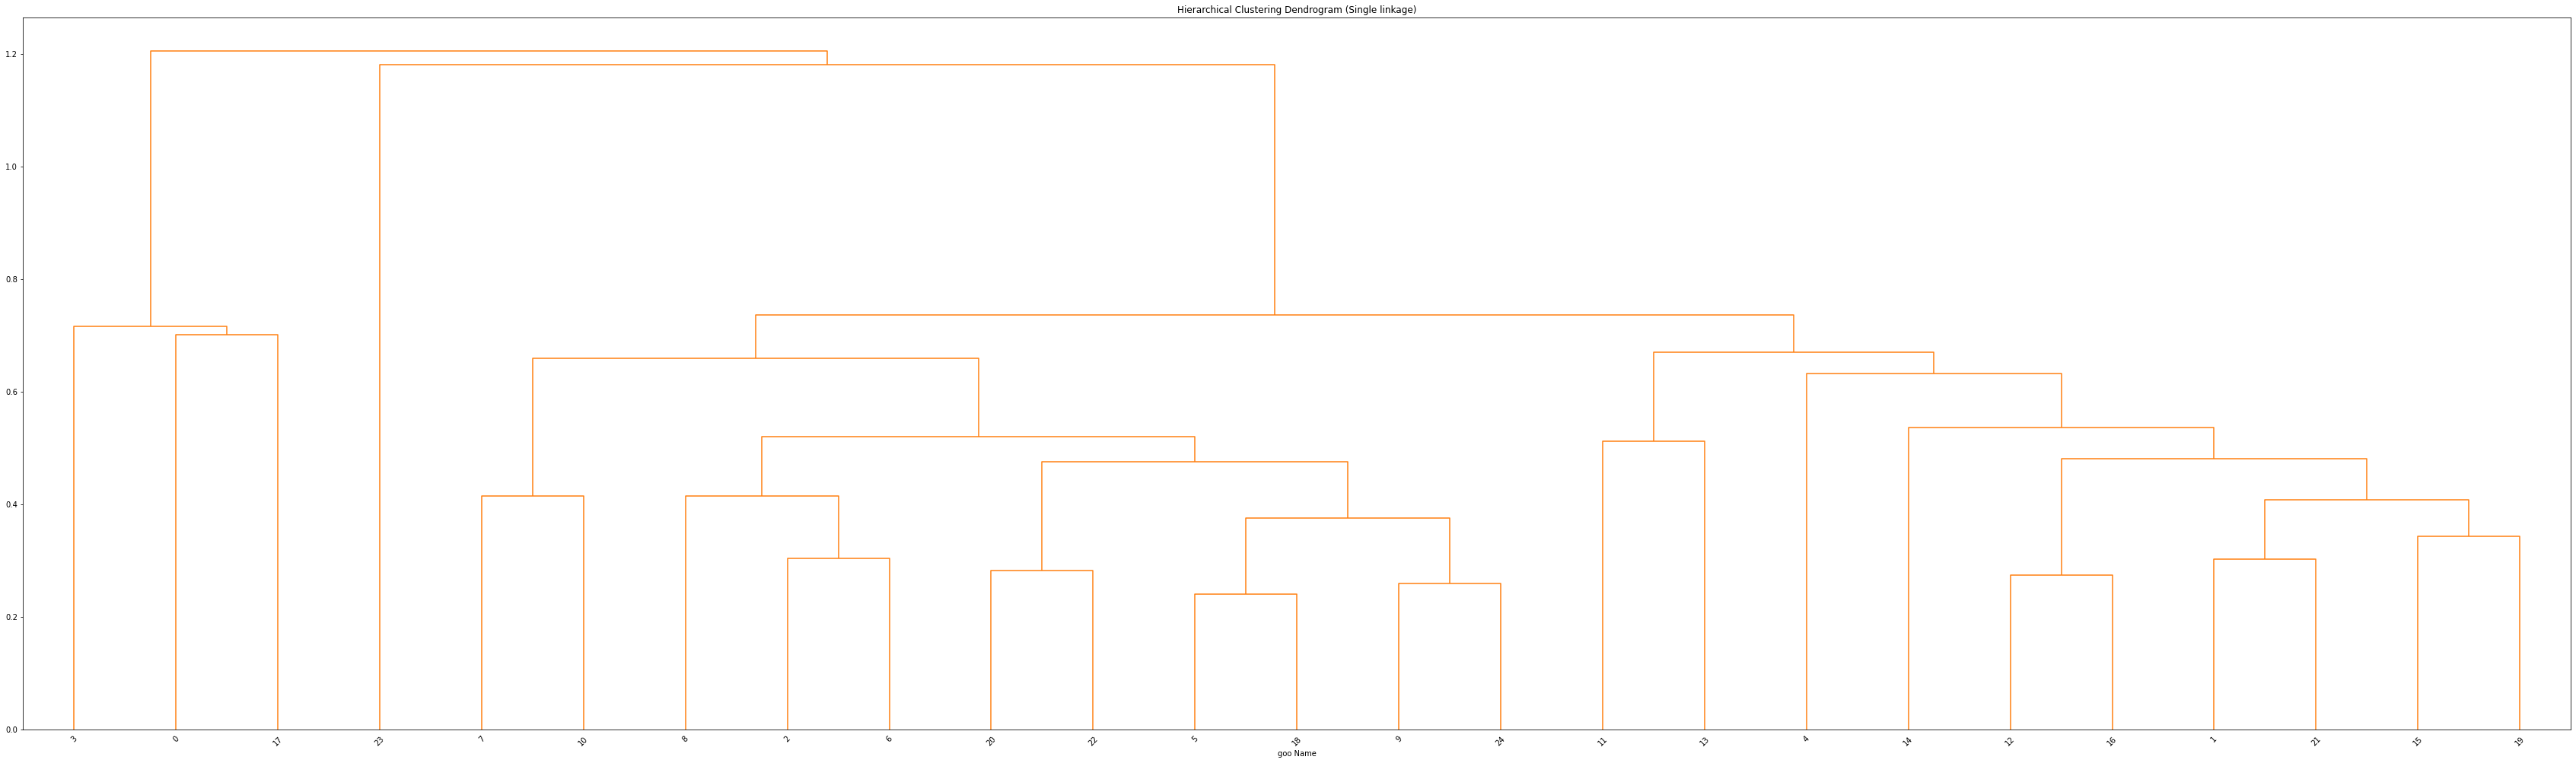

In [18]:
Z = linkage(goo_norm, method='average') # single / complete / average 
# complete 어느 정도 수준까지 같은 군집으로 볼 것인가

fig = plt.figure(figsize=(60, 20))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')  # 계층적 군집화를 실행하는 덴드로그램
plt.xlabel("goo Name")

dendrogram(Z, color_threshold = 6) # 어느 정도 수준까지를 같은 군집으로 볼 것이냐를 판단하고 시각화하는 옵션
plt.axhline(y=13, color='black', linewidth=10, linestyle='dashed')
plt.show()

## 여기서부터 진짜 클러스터링 적용
# 지역구 클러스터링
### sklearn 으로 덴드로그램
https://github.com/Hanbyeongrim/machine-learning-base/blob/833e18a7fc0d16094c7a2ae80e87a7b62eeb863b/Lab_03_2)%20Clustering.ipynb

#### 1) minmax

첫 스케일링이 minmax였는데 돌려보면 Single Linkage와 Complete Linkage의 중간쯤에 위치한 Average Linkage가 가장 괜찮은 형태의 클러스터를 형성한 것을 확인할 수 있어 앞으로 average method 를 사용

순서대로 single, complete, average 적용해보았고 그 중 average 선택 후 제거

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(goo_df)
goo_norm = pd.DataFrame(data, index = list(goo_df.index))

NameError: name 'goo_df' is not defined

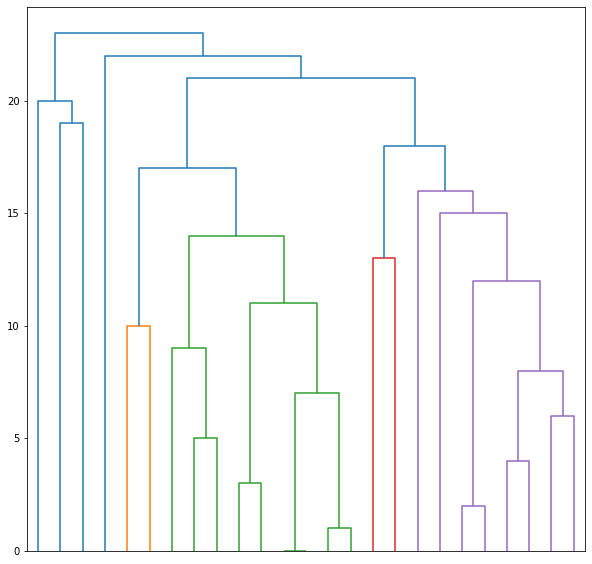

In [16]:
average_clustering = AgglomerativeClustering(n_clusters=3,
                                             linkage='average')
average_cluster = average_clustering.fit_predict(data)

plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = average_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = average_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

1 :  강남구, 강서구, 송파구
2 :  강동구, 강북구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 양천구, 영등포구, 용산구, 은평구, 종로구, 중랑구
3 :  중구


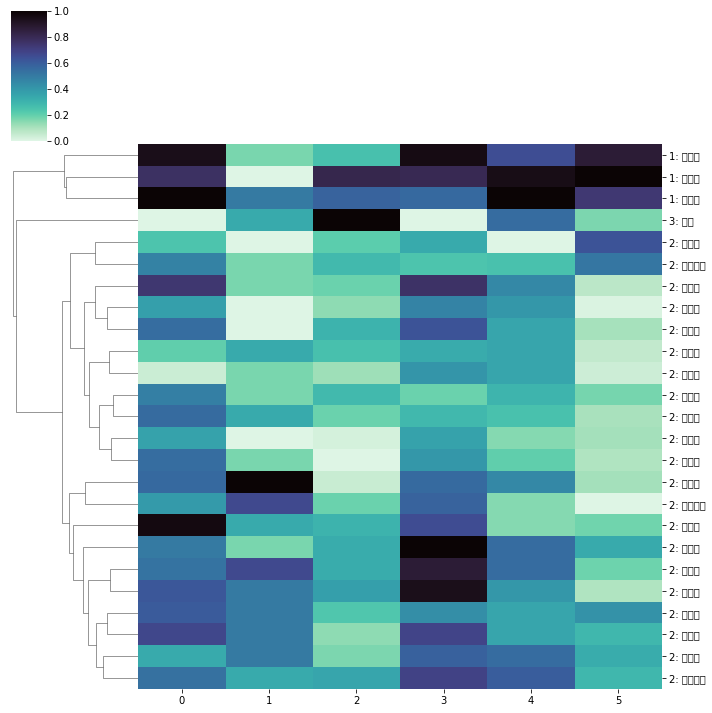

In [367]:
memb = fcluster(linkage(goo_norm, 'average'), 3, criterion='maxclust')
memb = pd.Series(memb, index=goo_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))
    

goo_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, goo_norm.index)]
sns.clustermap(goo_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

In [368]:
goo_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, goo_norm.index)] # 클러스터 변수 생성
grouped = goo_norm.groupby('cluster')

grouped.agg('mean')

,0,1,2,3,4,5
cluster,,,,,,
1,0.902658,0.222222,0.550388,0.773838,0.866667,0.866425
2,0.489199,0.317460,0.210410,0.542384,0.340476,0.194485
3,0.000000,0.333333,1.000000,0.000000,0.550000,0.161475


##### 2) Standardscale

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(goo_df)
goo_norm = pd.DataFrame(data, index = list(goo_df.index))

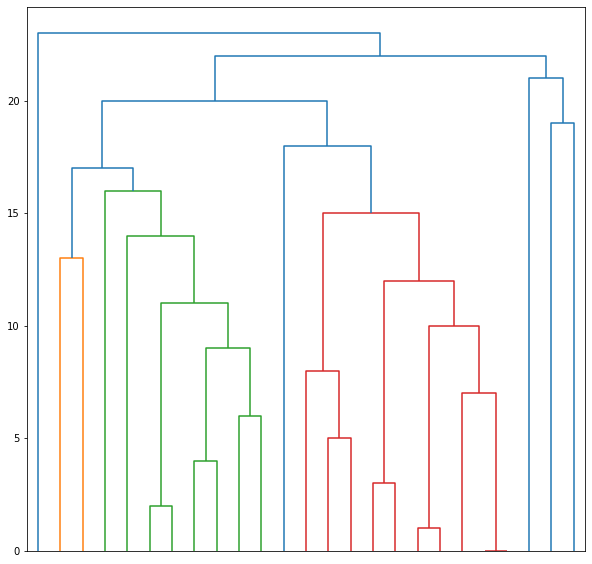

In [28]:
average_clustering = AgglomerativeClustering(n_clusters=2,
                                             linkage='average')
average_cluster = average_clustering.fit_predict(data)
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = average_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = average_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

In [30]:
memb = fcluster(linkage(goo_norm, 'average'), 2, criterion='maxclust')
memb = pd.Series(memb, index=goo_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))
    

goo_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, goo_norm.index)]
sns.clustermap(goo_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

1 :  강남구, 강동구, 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 송파구, 양천구, 영등포구, 용산구, 은평구, 종로구, 중랑구
2 :  중구


TypeError: unsupported operand type(s) for -: 'str' and 'float'

AttributeError: 'NoneType' object has no attribute 'reshape'

<Figure size 720x720 with 4 Axes>

In [31]:
goo_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, goo_norm.index)] # 클러스터 변수 생성
grouped = goo_norm.groupby('cluster')

grouped.agg('mean')

,0,1,2,3,4,5
cluster,,,,,,
1,0.087125,-0.004480,-0.134931,0.090832,-0.025106,0.017352
2,-2.090992,0.107521,3.238353,-2.179974,0.602534,-0.416439


###### 3) RobustScaler

In [3]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data = scaler.fit_transform(goo_df)
goo_norm = pd.DataFrame(data, index = list(goo_df.index))

NameError: name 'goo_df' is not defined

In [4]:
average_clustering = AgglomerativeClustering(n_clusters=4,
                                             linkage='average')
average_cluster = average_clustering.fit_predict(data)
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = average_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = average_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

NameError: name 'data' is not defined

1 :  강동구, 강북구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 서초구, 성동구, 성북구, 양천구, 영등포구, 용산구, 은평구, 종로구, 중랑구
2 :  강남구, 강서구, 송파구
3 :  중구


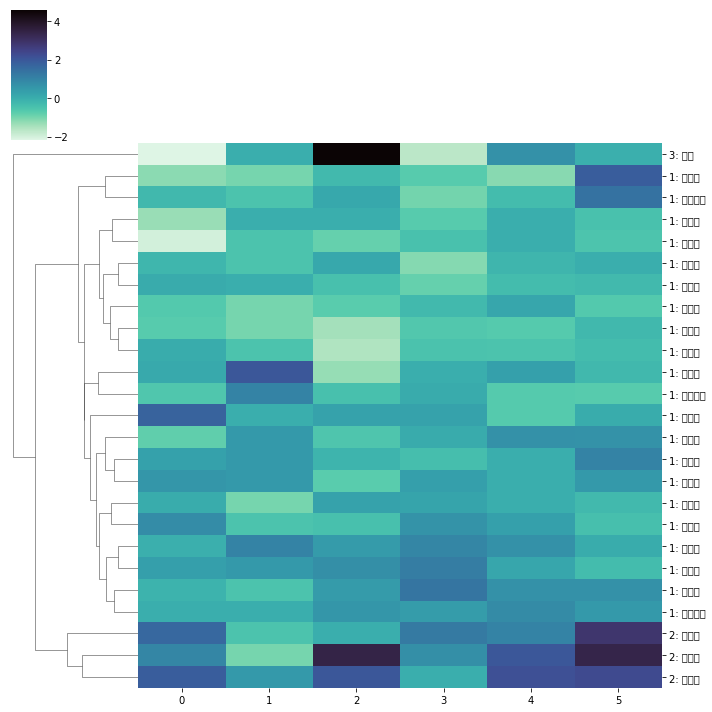

In [363]:
memb = fcluster(linkage(goo_norm, 'average'), 3, criterion='maxclust')
memb = pd.Series(memb, index=goo_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))
    

goo_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, goo_norm.index)]
sns.clustermap(goo_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

In [2]:
memb

NameError: name 'memb' is not defined

In [364]:
goo_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, goo_norm.index)] # 클러스터 변수 생성
grouped = goo_norm.groupby('cluster')

grouped.agg('mean')

,0,1,2,3,4,5
cluster,,,,,,
1,-0.183112,-0.047619,-0.278912,-0.054471,-0.031746,0.107833
2,1.481115,-0.333333,1.809524,0.649880,1.722222,2.844723
3,-2.152201,0.000000,4.571429,-1.705036,0.666667,-0.026619


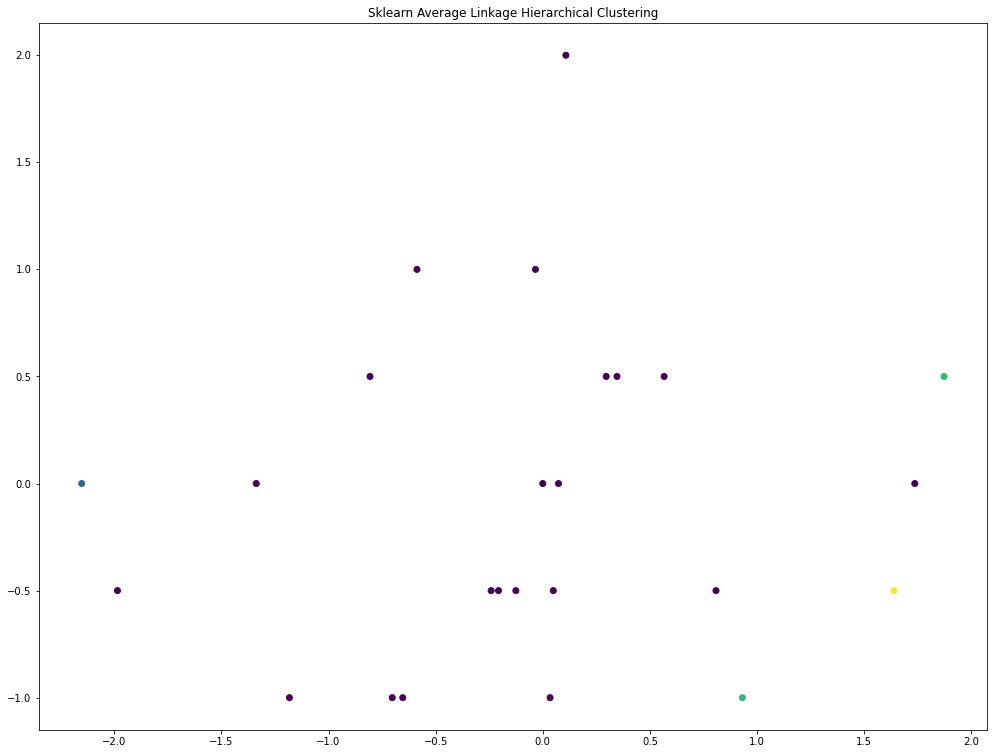

In [292]:
plt.figure(figsize=(17,13))

plt.scatter(data[:,0], data[:,1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')

plt.show()

## K-means
##### 1) minmax

In [42]:
goo_df = df2.copy()
goo_df = goo_df[["goo_nm","sum_hh", "count_zero", "count_market", "count_bus", "count_station", "sum_waste"]]
goo_df.set_index("goo_nm",inplace=True) # 지역구 이름 인덱싱 -> 정규화하기 위함

In [43]:
scaler = MinMaxScaler()
data = scaler.fit_transform(goo_df)
goo_norm = pd.DataFrame(data, index = list(goo_df.index))
goo_norm

,0,1,2,3,4,5
강남구,0.766122,0.000000,0.813953,0.801418,0.95,1.000000
강동구,0.608228,0.500000,0.232558,0.432624,0.35,0.415471
강북구,0.372307,0.000000,0.139535,0.470449,0.40,0.011625
강서구,0.941851,0.166667,0.255814,0.959811,0.65,0.868436
관악구,0.966079,0.333333,0.302326,0.654846,0.15,0.177751
광진구,0.483358,0.166667,0.279070,0.186761,0.30,0.168011
구로구,0.543122,0.000000,0.302326,0.631206,0.35,0.103831
금천구,0.240884,0.000000,0.209302,0.333333,0.00,0.630904
노원구,0.735535,0.166667,0.186047,0.761229,0.45,0.068180
도봉구,0.360133,0.000000,0.023256,0.361702,0.15,0.106407


Text(0, 0.5, 'Sum of squared distance')

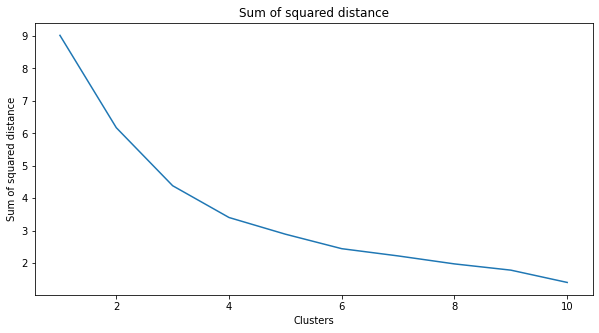

In [44]:
cluster_range = [i+1 for i in range(10)]
clus_error = []

for i in cluster_range:
    clus = KMeans(i)
    clus.fit(goo_norm)
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
plt.figure(figsize = (10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [45]:
kmeans = KMeans(n_clusters = 4).fit(goo_norm)
cluster_kmeans = [i+1 for i in kmeans.labels_]
goo_df["ClusterKmeans"] = cluster_kmeans

# 각 클러스터별 몇 개의 지역구가 속하는지 확인
# goo_1 = goo_df.groupby(goo_df['ClusterKmeans']).count().drop(columns={"sum_hh","count_market","count_bus","count_station","sum_waste"})
goo_1 = goo_df[["count_zero"]].groupby(goo_df['ClusterKmeans']).count()
goo_1 = goo_1.reset_index()

goo_2 = goo_df[["ClusterKmeans"]]
goo_2 = goo_2.rename(columns={"ClusterKmeans":"ClusterKmean"})
goo_2 = goo_2.reset_index()
goo_2 = goo_2.groupby("ClusterKmean", as_index=False).agg(",".join)
goo_2 = goo_2.reindex()

result = pd.concat([goo_1,goo_2],axis=1)
result = result[["ClusterKmeans","count_zero","goo_nm"]]
result = result.set_index("ClusterKmeans")
result = result.rename(columns={"count_zero":"len"})
result

,len,goo_nm
ClusterKmeans,,
1,1,중구
2,3,"강남구,강서구,송파구"
3,11,"강동구,관악구,노원구,동작구,마포구,서대문구,서초구,성동구,성북구,영등포구,은평구"
4,10,"강북구,광진구,구로구,금천구,도봉구,동대문구,양천구,용산구,종로구,중랑구"


In [48]:
from sklearn.cluster import KMeans

In [79]:
clusters=KMeans(n_clusters=4).fit(goo_norm)

goo_df['cluster']=clusters.labels_
qw1 = goo_df.groupby('cluster').count()
qw1 = qw1[["sum_hh"]]
qw1 = qw1.rename(columns={"sum_hh":"len"})

qw2=pd.DataFrame(clusters.cluster_centers_)
qw2=qw.rename(columns={0:'one_ratio',1:'count_zero',2:'count_market',3:'count_bus',4:'count_station',5:'sum_waste'})

In [81]:
result = pd.concat([qw1,qw2],axis=1)
result = result.drop(columns="cluster_count")
result

,len,one_ratio,count_zero,count_market,count_bus,count_station,sum_waste
0,3,0.381825,0.133333,0.179070,0.364303,0.260000,0.181402
1,10,0.586811,0.484848,0.238901,0.704277,0.413636,0.206379
2,11,0.902658,0.222222,0.550388,0.773838,0.866667,0.866425
3,1,0.000000,0.333333,1.000000,0.000000,0.550000,0.161475


In [87]:
goo_2 = goo_df[["ClusterKmeans"]]
goo_2 = goo_2.reset_index()
goo_2 = goo_2.groupby("ClusterKmeans", as_index=False).agg(",".join)
goo_2 = goo_2.reindex()
result2 = goo_2[["goo_nm"]]
result2
#pd.concat([result,result2],axis=1)

,goo_nm
0,"강북구,광진구,구로구,금천구,도봉구,동대문구,양천구,용산구,종로구,중랑구"
1,"강동구,관악구,노원구,동작구,마포구,서대문구,서초구,성동구,성북구,영등포구,은평구"
2,"강남구,강서구,송파구"
3,중구


###### 2) standard

In [27]:
scaler = StandardScaler()
data = scaler.fit_transform(goo_df)
goo_norm = pd.DataFrame(data, index = list(goo_df.index))

Text(0, 0.5, 'Sum of squared distance')

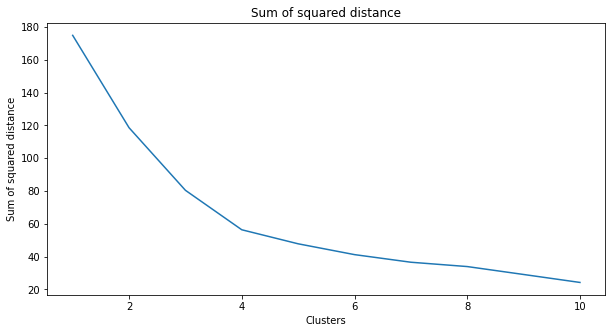

In [29]:
cluster_range = [i+1 for i in range(10)]
clus_error = []

for i in cluster_range:
    clus = KMeans(i)
    clus.fit(goo_norm)
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})

## 그래프 보고 싶으면 확인
plt.figure(figsize = (10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [30]:
kmeans = KMeans(n_clusters = 4).fit(goo_norm)
cluster_kmeans = [i+1 for i in kmeans.labels_]
goo_df["ClusterKmeans"] = cluster_kmeans

# 각 클러스터별 몇 개의 지역구가 속하는지 확인
# goo_1 = goo_df.groupby(goo_df['ClusterKmeans']).count().drop(columns={"sum_hh","count_market","count_bus","count_station","sum_waste"})
goo_1 = goo_df[["count_zero"]].groupby(goo_df['ClusterKmeans']).count()
goo_1 = goo_1.reset_index()

goo_2 = goo_df[["ClusterKmeans"]]
goo_2 = goo_2.rename(columns={"ClusterKmeans":"ClusterKmean"})
goo_2 = goo_2.reset_index()
goo_2 = goo_2.groupby("ClusterKmean", as_index=False).agg(",".join)
goo_2 = goo_2.reindex()

result = pd.concat([goo_1,goo_2],axis=1)
result = result[["ClusterKmeans","count_zero","goo_nm"]]
result = result.set_index("ClusterKmeans")
result = result.rename(columns={"count_zero":"len"})
result

,len,goo_nm
ClusterKmeans,,
1,10,"강북구,광진구,구로구,금천구,도봉구,동대문구,양천구,용산구,종로구,중랑구"
2,11,"강동구,관악구,노원구,동작구,마포구,서대문구,서초구,성동구,성북구,영등포구,은평구"
3,3,"강남구,강서구,송파구"
4,1,중구


##### 3) Robustscale

In [31]:
scaler = RobustScaler()
data = scaler.fit_transform(goo_df)
goo_norm = pd.DataFrame(data, index = list(goo_df.index))

Text(0, 0.5, 'Sum of squared distance')

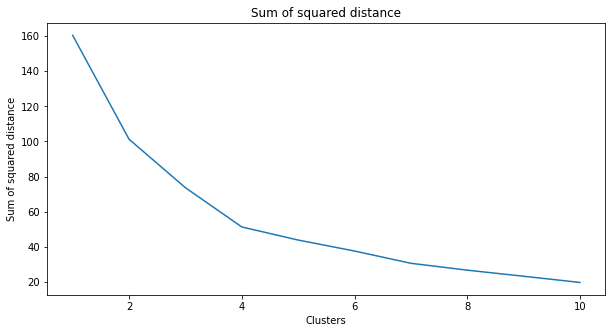

In [32]:
cluster_range = [i+1 for i in range(10)]
clus_error = []

for i in cluster_range:
    clus = KMeans(i)
    clus.fit(goo_norm)
    clus_error.append(clus.inertia_)

ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
plt.figure(figsize = (10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [33]:
kmeans = KMeans(n_clusters = 4).fit(goo_norm)
cluster_kmeans = [i+1 for i in kmeans.labels_]
goo_df["ClusterKmeans"] = cluster_kmeans

# 각 클러스터별 몇 개의 지역구가 속하는지 확인
# goo_1 = goo_df.groupby(goo_df['ClusterKmeans']).count().drop(columns={"sum_hh","count_market","count_bus","count_station","sum_waste"})
goo_1 = goo_df[["count_zero"]].groupby(goo_df['ClusterKmeans']).count()
goo_1 = goo_1.reset_index()

goo_2 = goo_df[["ClusterKmeans"]]
goo_2 = goo_2.rename(columns={"ClusterKmeans":"ClusterKmean"})
goo_2 = goo_2.reset_index()
goo_2 = goo_2.groupby("ClusterKmean", as_index=False).agg(",".join)
goo_2 = goo_2.reindex()

result = pd.concat([goo_1,goo_2],axis=1)
result = result[["ClusterKmeans","count_zero","goo_nm"]]
result = result.set_index("ClusterKmeans")
result = result.rename(columns={"count_zero":"len"})
result

,len,goo_nm
ClusterKmeans,,
1,11,"강동구,관악구,노원구,동작구,마포구,서대문구,서초구,성동구,성북구,영등포구,은평구"
2,10,"강북구,광진구,구로구,금천구,도봉구,동대문구,양천구,용산구,종로구,중랑구"
3,3,"강남구,강서구,송파구"
4,1,중구


# 행정동 클러스터링
## 계층적 클러스터링

In [576]:
st_df = df_동.copy()
st_df = st_df[["dong_nm","one_ratio", "count_zero", "count_market", "sum_bus", "sum_station", "sum_waste"]]
st_df.set_index("dong_nm",inplace=True) # 지역구 이름 인덱싱 -> 정규화하기 위함

In [577]:
dong_df = st_df.copy()
dong_df

,one_ratio,count_zero,count_market,sum_bus,sum_station,sum_waste
dong_nm,,,,,,
가락1동,0.037487,0,1,2605376,6434890,4271.9
가락2동,0.056981,0,2,2181971,3449427,4271.9
가락본동,0.096536,1,1,3081377,0,4271.9
가리봉동,0.157330,0,0,2235038,0,1278.5
가산동,0.308628,0,6,10824582,14509425,3794.8
...,...,...,...,...,...,...
효창동,0.086578,0,0,1258577,1545629,1052.6
후암동,0.127129,0,0,1910323,0,1052.6
휘경1동,0.177711,0,1,3743167,9501588,3237.0


##### 1) minmax

In [582]:
scaler = MinMaxScaler()
data = scaler.fit_transform(dong_df)
dong_norm = pd.DataFrame(data, index = list(dong_df.index))

In [583]:
memb = fcluster(linkage(dong_norm, 'average'), 4, criterion='maxclust')
df = pd.Series(memb, index=dong_norm.index)

In [587]:
df = pd.DataFrame(df,columns={"clusterNo"})
df = df.reset_index()
df = df.rename(columns={"index":"dong_nm"})

In [588]:
df

,dong_nm,clusterNo
0,0,4
1,1,4
2,2,4
3,3,4
4,4,2
...,...,...
419,419,4
420,420,4
421,421,4
422,422,4


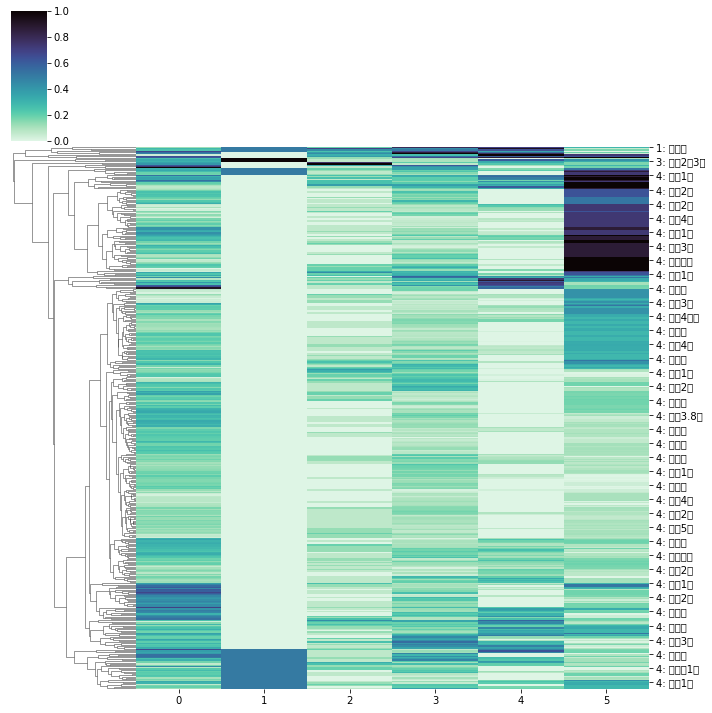

In [579]:
memb = fcluster(linkage(dong_norm, 'average'), 4, criterion='maxclust')
df = pd.Series(memb, index=dong_norm.index)

df = pd.DataFrame(df,columns={"clusterNo"})
df = df.reset_index()
df = df.rename(columns={"index":"dong_nm"})
df = df.groupby("clusterNo", as_index=False).agg(",".join)
df["len"] = ""
for i in range(4):
    df["len"][i] = len(df["dong_nm"][i])
    

dong_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, dong_norm.index)]
sns.clustermap(dong_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

In [581]:
len(df["dong_nm"][2])

16

In [565]:
df

,clusterNo,dong_nm,len
0,1,"서교동,신촌동,여의동,종로1.2.3.4가동,한강로동,회현동",32
1,2,"가산동,역삼1동,잠실6동",13
2,3,"상도4동,성내2동,성수2가3동",16
3,4,"가락1동,가락2동,가락본동,가리봉동,가양1동,가양2동,가양3동,가회동,갈현1동,갈현...",1967


In [566]:
dong_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, dong_norm.index)] # 클러스터 변수 생성
grouped = dong_norm.groupby('cluster')

grouped.agg('mean')

,0,1,2,3,4,5
cluster,,,,,,
1,0.386905,0.333333,0.395833,0.710169,0.654440,0.120379
2,0.431908,0.000000,0.270833,0.487574,0.819896,0.787248
3,0.297730,1.000000,0.083333,0.102677,0.312748,0.282524
4,0.226093,0.043689,0.079490,0.156830,0.096288,0.295609


##### 2) standard

In [567]:
dong_df = st_df.copy()

In [568]:
scaler = StandardScaler()
data = scaler.fit_transform(dong_df)
dong_norm = pd.DataFrame(data, index = list(dong_df.index))

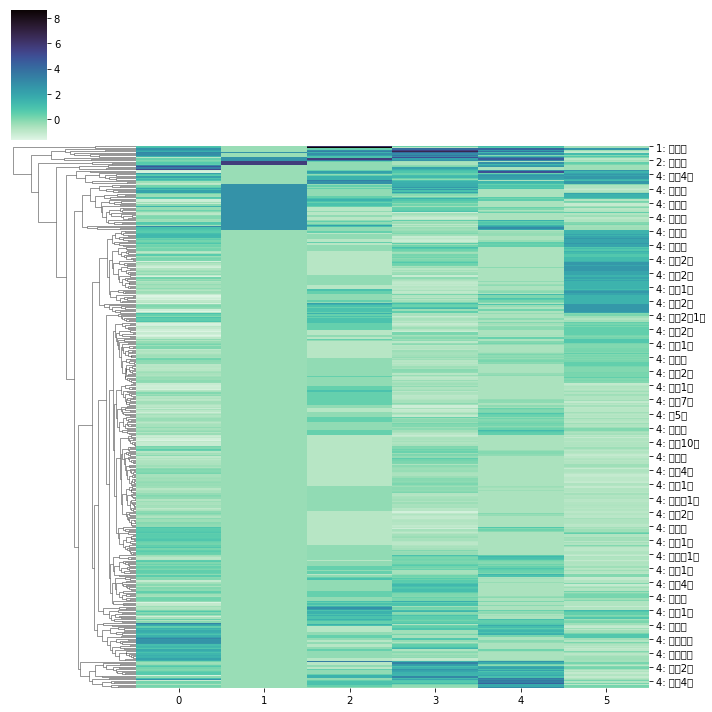

In [569]:
memb = fcluster(linkage(dong_norm, 'average'), 4, criterion='maxclust')
df = pd.Series(memb, index=dong_norm.index)

df = pd.DataFrame(df,columns={"clusterNo"})
df = df.reset_index()
df = df.rename(columns={"index":"dong_nm"})
df = df.groupby("clusterNo", as_index=False).agg(",".join)
df["len"] = ""
for i in range(4):
    df["len"][i] = len(df["dong_nm"][i])
    

dong_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, dong_norm.index)]
sns.clustermap(dong_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

In [570]:
df

,clusterNo,dong_nm,len
0,1,"광희동,신당동",7
1,2,"가산동,서교동,신촌동,여의동,역삼1동,영등포동,용신동,종로1.2.3.4가동,한강로동...",50
2,3,"상도4동,성내2동,성수2가3동",16
3,4,"가락1동,가락2동,가락본동,가리봉동,가양1동,가양2동,가양3동,가회동,갈현1동,갈현...",1955


In [571]:
dong_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, dong_norm.index)] # 클러스터 변수 생성
grouped = dong_norm.groupby('cluster')

grouped.agg('mean')

,0,1,2,3,4,5
cluster,,,,,,
1,0.993225,-0.325823,7.447299,-0.268992,0.895122,-0.471201
2,1.613561,0.875474,2.378075,3.965072,2.635267,0.066225
3,0.464781,5.680662,-0.018999,-0.513448,1.131596,-0.048818
4,-0.047717,-0.061479,-0.094421,-0.091864,-0.077109,0.001043


##### 3) Robustscaler

In [572]:
dong_df = st_df.copy()
scaler = RobustScaler()
data = scaler.fit_transform(dong_df)
dong_norm = pd.DataFrame(data, index = list(dong_df.index))

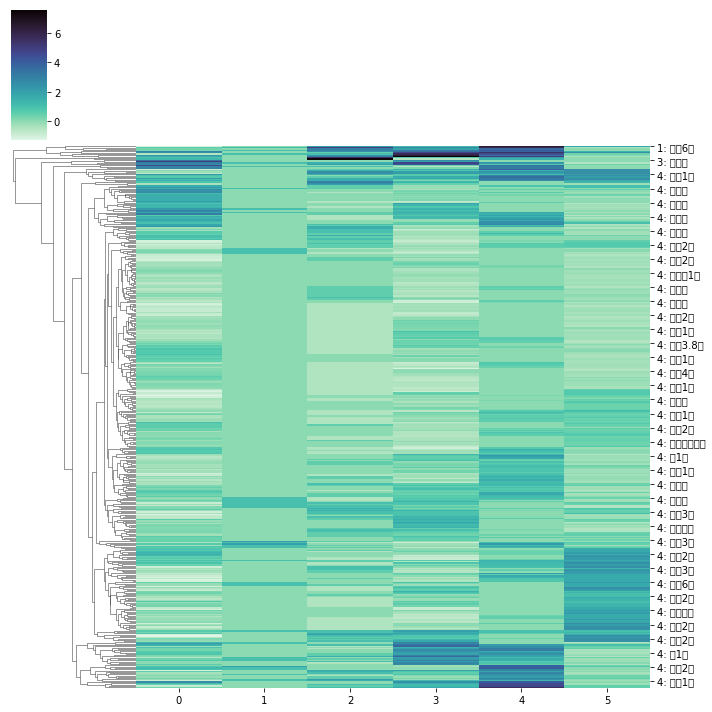

In [573]:
memb = fcluster(linkage(dong_norm, 'average'), 4, criterion='maxclust')
df = pd.Series(memb, index=dong_norm.index)

df = pd.DataFrame(df,columns={"clusterNo"})
df = df.reset_index()
df = df.rename(columns={"index":"dong_nm"})
df = df.groupby("clusterNo", as_index=False).agg(",".join)
df["len"] = ""
for i in range(4):
    df["len"][i] = len(df["dong_nm"][i])
    

dong_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, dong_norm.index)]
sns.clustermap(dong_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

In [574]:
df

,clusterNo,dong_nm,len
0,1,"가산동,명동,서교동,여의동,역삼1동,잠실6동,종로1.2.3.4가동,한강로동,회현동",45
1,2,"광희동,신당동",7
2,3,"대학동,신림동,신촌동,영등포동",16
3,4,"가락1동,가락2동,가락본동,가리봉동,가양1동,가양2동,가양3동,가회동,갈현1동,갈현...",1960


In [575]:
dong_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, dong_norm.index)] # 클러스터 변수 생성
grouped = dong_norm.groupby('cluster')

grouped.agg('mean')

,0,1,2,3,4,5
cluster,,,,,,
1,0.971420,0.333333,2.500000,4.093383,4.701586,0.559501
2,1.094597,0.000000,6.500000,0.044987,1.731683,-0.049798
3,3.516618,0.250000,0.875000,3.416359,0.707943,-0.051865
4,0.129874,0.102689,0.094132,0.224867,0.616588,0.365153
